In [1]:
%run jupyterutils.py

from algorithms.unsupervised.softmax.SoftMax import SoftMax

### Softmax model with multiple feature
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [2]:
def ModelEquation(x1,x2):
    return (9.8*x1 + 3.2*x2 + 7.6)%5

In [3]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
print("y = ", end='')
sp.pprint(ModelEquation(x1,x2))

y = (9.8⋅x₁ + 3.2⋅x₂ + 2.6) mod 5


In [4]:
total_data_points = 50000
rng = np.random.default_rng(0)             # reproducible
x1 = rng.uniform(0, 2, total_data_points)  # U(0,2)
x2 = rng.uniform(0, 2, total_data_points)  # completely separate draw
y = ModelEquation(x1,x2)
y = y.astype(np.int64)

# perm = np.random.permutation(len(x1))
# x1 = x1[perm]
# x2 = x2[perm]
# y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [5]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = np.array([x1[:training_numbers],x2[:training_numbers]]).T
training_labels = np.array(y[:training_numbers])

testing_attributes=np.array([x1[training_numbers:],x2[training_numbers:]]).T
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 2)
(7500, 2)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.26750026 0.63508622 0.10280339 0.71914078 0.07685093]
 [0.13357125 0.39869683 0.773234   0.02418659 0.84258774]]  bias  [ 7.06752013e-06 -4.53275698e-06 -1.09830786e-06  5.02445408e-07
 -1.93890070e-06] loss 1.6596645713512694
Iteration  1000  weights  [[0.27469056 0.62908383 0.10391438 0.7172349  0.07645791]
 [0.14186003 0.39482634 0.77021967 0.02737647 0.8379939 ]]  bias  [ 0.00691588 -0.00439258 -0.00109637  0.00046613 -0.00189306] loss 1.656776033919987
Iteration  2000  weights  [[0.28154072 0.62341837 0.10501926 0.715257   0.07614623]
 [0.14982513 0.39123664 0.76721891 0.03047594 0.83351979]]  bias  [ 0.01351248 -0.00850462 -0.00218219  0.00086399 -0.00368967] loss 1.654133362884072
Iteration  3000  weights  [[0.28805866 0.61806747 0.10612319 0.71321743 0.07591483]
 [0.15747336 0.38790855 0.76423761 0.03349321 0.82916369]]  bias  [ 0.01980454 -0.01235918 -0.00325409  0.00120219 -0.00539346] loss 1.6517157301319945
Iteration  4000  weights  [[0.29425278 0

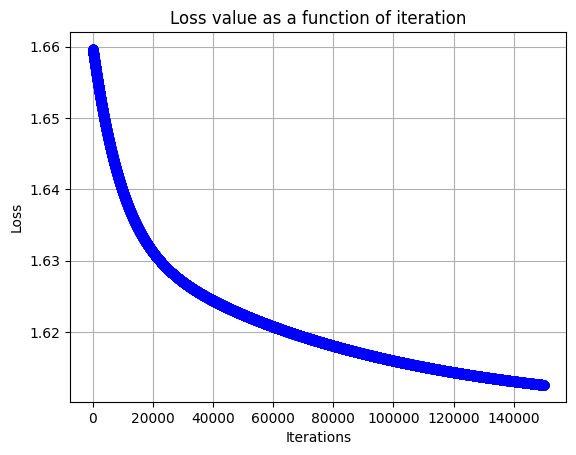

In [6]:
model = SoftMax(training_features, training_labels , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

plotLineGraph("Iterations", "Loss", "Loss value as a function of iteration",x,values)



#### Prediction Details

In [7]:
print("Predicted weights ", model.weight, " bias ", model.bias)

actual     = testing_labels            # full y-vector, shape (n_samples,)
probs, pred_oh = model.predict(testing_attributes, predictOneHot=True)
loss = model.calculateCrossEntropyLoss(probs, pred_oh)


print("Prediction loss", loss)

Predicted weights  [[0.34816665 0.47744879 0.28643378 0.47872592 0.21060643]
 [0.35705578 0.38888568 0.55408094 0.28422686 0.58802715]]  bias  [ 0.10765007 -0.07328381 -0.03874138  0.00575671 -0.0013816 ]
Prediction loss 1.5124068221642941
